# EDA: voy a hacer el EDA de los taxis amarillos del año 2021, pero en general es del 2017,2018,2019,2021,2022

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
tabla1 = pd.read_parquet("Datasets/Datasets_complementario/taxis_uber/taxis_amarillo/2021/taxis_amarillos_1.parquet")
tabla2 = pd.read_parquet("Datasets/Datasets_complementario/taxis_uber/taxis_amarillo/2021/taxis_amarillos_2.parquet")
tabla3 = pd.read_parquet("Datasets/Datasets_complementario/taxis_uber/taxis_amarillo/2021/taxis_amarillos_3.parquet")
tabla4 = pd.read_parquet("Datasets/Datasets_complementario/taxis_uber/taxis_amarillo/2021/taxis_amarillos_4.parquet")
tabla5 = pd.read_parquet("Datasets/Datasets_complementario/taxis_uber/taxis_amarillo/2021/taxis_amarillos_5.parquet")
tabla6 = pd.read_parquet("Datasets/Datasets_complementario/taxis_uber/taxis_amarillo/2021/taxis_amarillos_6.parquet")
tabla7 = pd.read_parquet("Datasets/Datasets_complementario/taxis_uber/taxis_amarillo/2021/taxis_amarillos_7.parquet")
tabla8 = pd.read_parquet("Datasets/Datasets_complementario/taxis_uber/taxis_amarillo/2021/taxis_amarillos_8.parquet")
tabla9 = pd.read_parquet("Datasets/Datasets_complementario/taxis_uber/taxis_amarillo/2021/taxis_amarillos_9.parquet")
tabla10 = pd.read_parquet("Datasets/Datasets_complementario/taxis_uber/taxis_amarillo/2021/taxis_amarillos_10.parquet")
tabla11 = pd.read_parquet("Datasets/Datasets_complementario/taxis_uber/taxis_amarillo/2021/taxis_amarillos_11.parquet")
tabla12 = pd.read_parquet("Datasets/Datasets_complementario/taxis_uber/taxis_amarillo/2021/taxis_amarillos_12.parquet")

## Vista de un mes en particular para poder luego poder generalizar


In [5]:
mes1 = tabla1.copy()
mes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369769 entries, 0 to 1369768
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1369769 non-null  int64         
 1   tpep_pickup_datetime   1369769 non-null  datetime64[us]
 2   tpep_dropoff_datetime  1369769 non-null  datetime64[us]
 3   passenger_count        1271417 non-null  float64       
 4   trip_distance          1369769 non-null  float64       
 5   RatecodeID             1271417 non-null  float64       
 6   store_and_fwd_flag     1271417 non-null  object        
 7   PULocationID           1369769 non-null  int64         
 8   DOLocationID           1369769 non-null  int64         
 9   payment_type           1369769 non-null  int64         
 10  fare_amount            1369769 non-null  float64       
 11  extra                  1369769 non-null  float64       
 12  mta_tax                13697

* haciendo una vista en la estructura de la tabla, podemos ver que de hay nulos en el passanger_count,RatecodeID,Syore_and_fwd_flag,congestion_surcharge y airport_fee

In [6]:
mes1[mes1["passenger_count"].isna()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1271417,2,2021-01-01 00:06:47,2021-01-01 00:54:51,NaN,15.95,NaN,None,49,86,0,45.65,0.00,0.5,2.75,0.00,0.3,49.20,NaN,NaN
1271418,2,2021-01-01 00:43:03,2021-01-01 01:20:56,NaN,18.28,NaN,None,45,15,0,59.87,0.00,0.5,2.75,0.00,0.3,63.42,NaN,NaN
1271419,1,2021-01-01 00:35:18,2021-01-01 00:40:52,NaN,0.00,NaN,None,262,237,0,4.20,0.50,0.5,2.80,0.00,0.3,12.80,NaN,NaN
1271420,2,2021-01-01 00:38:00,2021-01-01 00:51:00,NaN,3.04,NaN,None,137,142,0,18.34,0.00,0.5,2.75,0.00,0.3,21.89,NaN,NaN
1271421,2,2021-01-01 00:13:47,2021-01-01 00:39:18,NaN,14.65,NaN,None,226,219,0,44.62,0.00,0.5,2.75,0.00,0.3,48.17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369764,2,2021-01-31 23:03:00,2021-01-31 23:33:00,NaN,8.89,NaN,None,229,181,0,27.78,0.00,0.5,7.46,0.00,0.3,38.54,NaN,NaN
1369765,2,2021-01-31 23:29:00,2021-01-31 23:51:00,NaN,7.43,NaN,None,41,70,0,32.58,0.00,0.5,0.00,6.12,0.3,39.50,NaN,NaN
1369766,2,2021-01-31 23:25:00,2021-01-31 23:38:00,NaN,6.26,NaN,None,74,137,0,16.85,0.00,0.5,3.90,0.00,0.3,24.05,NaN,NaN
1369767,6,2021-01-31 23:01:06,2021-02-01 00:02:03,NaN,19.70,NaN,None,265,188,0,53.68,0.00,0.5,0.00,0.00,0.3,54.48,NaN,NaN


* con este analisis de nulos podemos ver que coinciden los nulos de las columnas anteriormente mencionadas,por lo visto en el tiempo de partida a llegada al destino,vamos a analizar que rango horario son estos nulos

In [7]:
mes1["hora"] = mes1["tpep_dropoff_datetime"].dt.hour
mes1["hora"].unique()

array([ 0,  1, 22, 23, 17, 13,  2, 21,  3, 18,  4,  5,  6,  7,  8,  9, 10,
       11, 12, 14, 15, 16, 19, 20], dtype=int32)

* tenemos varias columnas que nos son utiles en nulos,por lo cual vamos a proceder a borrar esos nulos.tambien vamos a borrar airport_fee y store_and_fwd_flag

In [8]:
mes1 = mes1.dropna(subset="passenger_count")
mes1 = mes1.drop(["airport_fee","store_and_fwd_flag"],axis=1)

* luego de borrar los nulos,vamos a normalizar las columnas

In [9]:
mes1["passenger_count"] = mes1["passenger_count"].astype(int)
mes1["RatecodeID"] = mes1["RatecodeID"].astype(int)

* chequeamos si hay viajes donde haya 0 de recorrido

In [10]:
mes1[mes1["trip_distance"] == 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hora
38,1,2021-01-01 00:03:13,2021-01-01 00:03:19,1,0.0,1,169,169,3,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0
39,1,2021-01-01 00:52:42,2021-01-01 01:04:49,1,0.0,1,238,42,1,17.20,0.0,0.5,0.00,0.0,0.3,18.00,0.0,1
160,1,2021-01-01 00:30:33,2021-01-01 00:31:04,2,0.0,5,233,233,1,12.00,0.0,0.0,2.45,0.0,0.3,14.75,0.0,0
185,1,2021-01-01 00:11:12,2021-01-01 00:24:57,1,0.0,1,107,256,1,17.20,0.0,0.5,0.00,0.0,0.3,18.00,0.0,0
255,2,2021-01-01 00:53:25,2021-01-01 00:53:29,1,0.0,5,89,89,1,45.00,0.0,0.0,0.00,0.0,0.3,45.30,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271337,1,2021-01-31 23:06:40,2021-01-31 23:07:05,1,0.0,5,138,138,3,0.01,0.0,0.0,0.00,0.0,0.3,0.31,0.0,23
1271371,2,2021-01-31 23:08:49,2021-01-31 23:08:58,1,0.0,5,153,153,1,45.00,0.0,0.0,0.00,0.0,0.3,45.30,0.0,23
1271373,1,2021-01-31 23:09:32,2021-01-31 23:09:47,1,0.0,1,24,24,2,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0,23
1271382,2,2021-01-31 23:42:01,2021-01-31 23:42:10,1,0.0,2,138,138,2,52.00,0.0,0.5,0.00,0.0,0.3,52.80,0.0,23


* por medio de una observacion,notamos que hay distancia recorrida de 0 pero no coinciden el ID de salida con el de llegada,tampoco con los tiempos. aunque tienen datos las demas columnas como para sacar conclusiones, vamos a omitirlos ya que buscamos los mayores recorridos y tambien las zonas donde mas se desplazan.

In [11]:
mes1 = mes1[mes1["trip_distance"] != 0]

* chequeamos si hay valores duplicados, en alguna columna

In [12]:
mes1[mes1.duplicated()]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hora


* anteriormente podemos ver que no hay duplicados

### graficas del mes

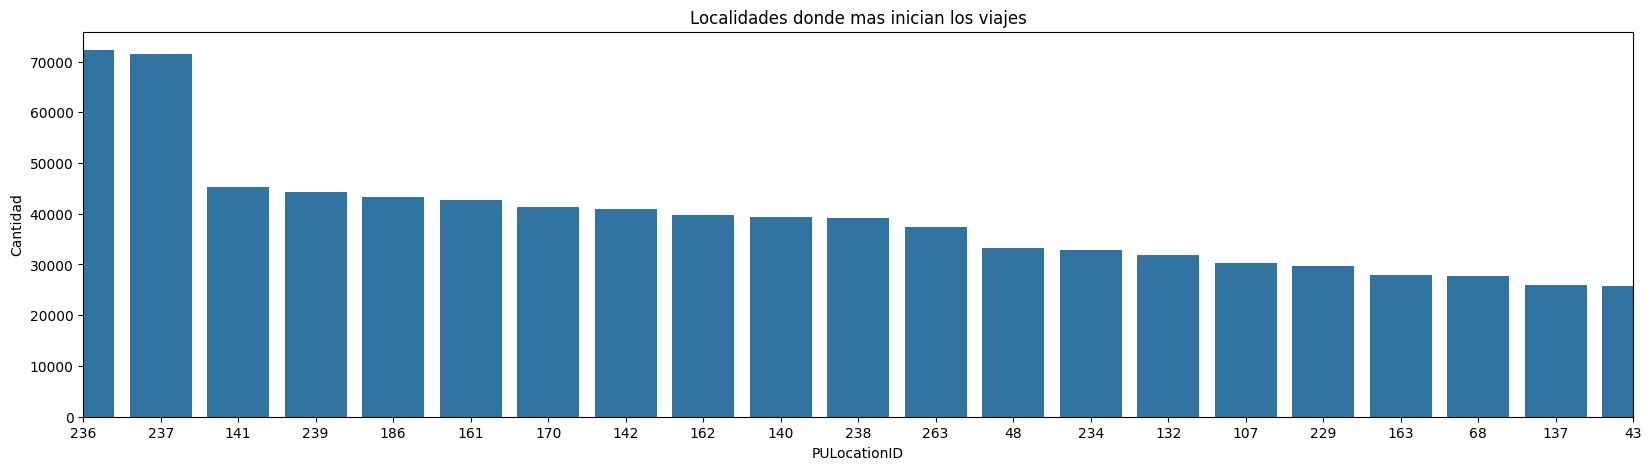

In [13]:
plt.figure(figsize=(20,5))
Localidades_ordenados = mes1.value_counts(subset="PULocationID",ascending=False).index
sns.countplot(data=mes1,x="PULocationID",order=Localidades_ordenados)
plt.title("Localidades donde mas inician los viajes")
plt.xlim(0,20)
plt.ylabel("Cantidad")
plt.show()

* acá podemos ver que la mayoria de los viajes salieron de la zona 236 y 237. que son la zona Upper East Side North,Manhattan y Upper East Side South,Manhattan

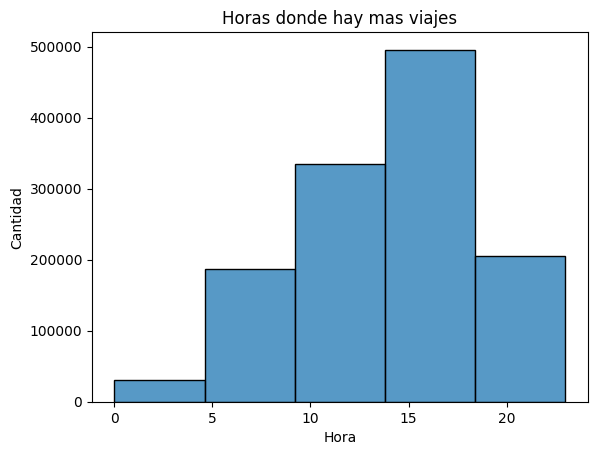

In [14]:
sns.histplot(data=mes1,x="hora",bins=5)
plt.title("Horas donde hay mas viajes")
plt.xlabel("Hora")
plt.ylabel("Cantidad")
plt.show()

* la mayoria de los viajes son entre las 10 hasta las 19 horas, donde se produce la mayoria del trafico

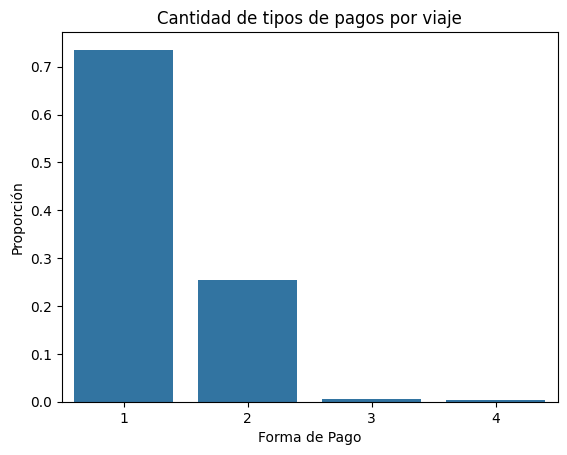

In [15]:
sns.countplot(data=mes1, x="payment_type",stat="proportion")
plt.xlabel("Forma de Pago")
plt.ylabel("Proporción")
plt.title("Cantidad de tipos de pagos por viaje")
plt.show()

* podemos ver que mas del 70% utilizan la forma de pago en tarjeta de credito y aproximadamente el 25% en efectivo

---

## fabricacion de dataset agrupado y graficas generalizadas


In [16]:
tabla1["fecha"] = tabla1["tpep_pickup_datetime"].dt.date
tabla2["fecha"] = tabla2["tpep_pickup_datetime"].dt.date
tabla3["fecha"] = tabla3["tpep_pickup_datetime"].dt.date
tabla4["fecha"] = tabla4["tpep_pickup_datetime"].dt.date
tabla5["fecha"] = tabla5["tpep_pickup_datetime"].dt.date
tabla6["fecha"] = tabla6["tpep_pickup_datetime"].dt.date
tabla7["fecha"] = tabla7["tpep_pickup_datetime"].dt.date
tabla8["fecha"] = tabla8["tpep_pickup_datetime"].dt.date
tabla9["fecha"] = tabla9["tpep_pickup_datetime"].dt.date
tabla10["fecha"] = tabla10["tpep_pickup_datetime"].dt.date
tabla11["fecha"] = tabla11["tpep_pickup_datetime"].dt.date
tabla12["fecha"] = tabla12["tpep_pickup_datetime"].dt.date
tabla1.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","airport_fee","store_and_fwd_flag"],axis=1,inplace=True)
tabla2.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","airport_fee","store_and_fwd_flag"],axis=1,inplace=True)
tabla3.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","airport_fee","store_and_fwd_flag"],axis=1,inplace=True)
tabla4.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","airport_fee","store_and_fwd_flag"],axis=1,inplace=True)
tabla5.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","airport_fee","store_and_fwd_flag"],axis=1,inplace=True)
tabla6.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","airport_fee","store_and_fwd_flag"],axis=1,inplace=True)
tabla7.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","airport_fee","store_and_fwd_flag"],axis=1,inplace=True)
tabla8.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","airport_fee","store_and_fwd_flag"],axis=1,inplace=True)
tabla9.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","airport_fee","store_and_fwd_flag"],axis=1,inplace=True)
tabla10.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","airport_fee","store_and_fwd_flag"],axis=1,inplace=True)
tabla11.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","airport_fee","store_and_fwd_flag"],axis=1,inplace=True)
tabla12.drop(["tpep_pickup_datetime","tpep_dropoff_datetime","airport_fee","store_and_fwd_flag"],axis=1,inplace=True)

In [17]:
tabla1

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,fecha
0,1,1.0,2.10,1.0,142,43,2,8.00,3.00,0.5,0.00,0.00,0.3,11.80,2.5,2021-01-01
1,1,1.0,0.20,1.0,238,151,2,3.00,0.50,0.5,0.00,0.00,0.3,4.30,0.0,2021-01-01
2,1,1.0,14.70,1.0,132,165,1,42.00,0.50,0.5,8.65,0.00,0.3,51.95,0.0,2021-01-01
3,1,0.0,10.60,1.0,138,132,1,29.00,0.50,0.5,6.05,0.00,0.3,36.35,0.0,2021-01-01
4,2,1.0,4.94,1.0,68,33,1,16.50,0.50,0.5,4.06,0.00,0.3,24.36,2.5,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369764,2,NaN,8.89,NaN,229,181,0,27.78,0.00,0.5,7.46,0.00,0.3,38.54,NaN,2021-01-31
1369765,2,NaN,7.43,NaN,41,70,0,32.58,0.00,0.5,0.00,6.12,0.3,39.50,NaN,2021-01-31
1369766,2,NaN,6.26,NaN,74,137,0,16.85,0.00,0.5,3.90,0.00,0.3,24.05,NaN,2021-01-31
1369767,6,NaN,19.70,NaN,265,188,0,53.68,0.00,0.5,0.00,0.00,0.3,54.48,NaN,2021-01-31


In [18]:
tabla_agrupada1 = tabla1.groupby(["fecha","VendorID","payment_type","RatecodeID","PULocationID","DOLocationID"]).sum().reset_index()
tabla_agrupada2 = tabla2.groupby(["fecha","VendorID","payment_type","RatecodeID","PULocationID","DOLocationID"]).sum().reset_index()
tabla_agrupada3 = tabla3.groupby(["fecha","VendorID","payment_type","RatecodeID","PULocationID","DOLocationID"]).sum().reset_index()
tabla_agrupada4 = tabla4.groupby(["fecha","VendorID","payment_type","RatecodeID","PULocationID","DOLocationID"]).sum().reset_index()
tabla_agrupada5 = tabla5.groupby(["fecha","VendorID","payment_type","RatecodeID","PULocationID","DOLocationID"]).sum().reset_index()
tabla_agrupada6 = tabla6.groupby(["fecha","VendorID","payment_type","RatecodeID","PULocationID","DOLocationID"]).sum().reset_index()
tabla_agrupada7 = tabla7.groupby(["fecha","VendorID","payment_type","RatecodeID","PULocationID","DOLocationID"]).sum().reset_index()
tabla_agrupada8 = tabla8.groupby(["fecha","VendorID","payment_type","RatecodeID","PULocationID","DOLocationID"]).sum().reset_index()
tabla_agrupada9 = tabla9.groupby(["fecha","VendorID","payment_type","RatecodeID","PULocationID","DOLocationID"]).sum().reset_index()
tabla_agrupada10 = tabla10.groupby(["fecha","VendorID","payment_type","RatecodeID","PULocationID","DOLocationID"]).sum().reset_index()
tabla_agrupada11 = tabla11.groupby(["fecha","VendorID","payment_type","RatecodeID","PULocationID","DOLocationID"]).sum().reset_index()
tabla_agrupada12 = tabla12.groupby(["fecha","VendorID","payment_type","RatecodeID","PULocationID","DOLocationID"]).sum().reset_index()

* mediante investigacion sobre la funcion groupby, ya trae un parametro con dropna=True en la funcion, por lo cual los nulos que tienen todos los meses no estarian en la tabla agrupada

In [19]:
tabla_agrupada1

,fecha,VendorID,payment_type,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2008-12-31,2,2,1.0,193,193,1.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
1,2009-01-01,2,2,1.0,41,238,6.0,1.31,8.5,0.0,0.5,0.00,0.0,0.3,11.80,2.5
2,2009-01-01,2,2,1.0,132,10,1.0,4.09,13.0,0.5,0.5,0.00,0.0,0.3,14.30,0.0
3,2009-01-01,2,2,1.0,188,89,1.0,1.46,9.5,0.0,0.5,0.00,0.0,0.3,10.30,0.0
4,2020-12-31,2,1,1.0,48,239,1.0,1.74,7.0,0.5,0.5,3.24,0.0,0.3,14.04,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329878,2021-01-31,2,4,5.0,164,164,1.0,0.00,-10.0,0.0,-0.5,0.00,0.0,-0.3,-13.30,-2.5
329879,2021-02-01,2,1,1.0,162,141,1.0,1.39,7.0,0.0,0.5,1.54,0.0,0.3,11.84,2.5
329880,2021-02-01,2,1,1.0,164,161,2.0,0.73,4.5,0.0,0.5,1.00,0.0,0.3,8.80,2.5
329881,2021-02-01,2,2,1.0,229,48,2.0,1.68,9.0,0.0,0.5,0.00,0.0,0.3,12.30,2.5


In [20]:
tabla_unificada = pd.concat([tabla_agrupada1,tabla_agrupada2,tabla_agrupada3,tabla_agrupada4,tabla_agrupada5,tabla_agrupada6,
                             tabla_agrupada7,tabla_agrupada8,tabla_agrupada9,tabla_agrupada10,tabla_agrupada11,tabla_agrupada12])

In [21]:
tabla_unificada["passenger_count"] = tabla_unificada["passenger_count"].astype(int)
tabla_unificada["RatecodeID"] = tabla_unificada["RatecodeID"].astype(int)
tabla_unificada["fecha"] = pd.to_datetime(tabla_unificada["fecha"])
tabla_unificada["año"] = tabla_unificada["fecha"].dt.year
tabla_unificada

,fecha,VendorID,payment_type,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,año
0,2008-12-31,2,2,1,193,193,1,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,2008
1,2009-01-01,2,2,1,41,238,6,1.31,8.5,0.0,0.5,0.00,0.00,0.3,11.80,2.5,2009
2,2009-01-01,2,2,1,132,10,1,4.09,13.0,0.5,0.5,0.00,0.00,0.3,14.30,0.0,2009
3,2009-01-01,2,2,1,188,89,1,1.46,9.5,0.0,0.5,0.00,0.00,0.3,10.30,0.0,2009
4,2020-12-31,2,1,1,48,239,1,1.74,7.0,0.5,0.5,3.24,0.00,0.3,14.04,2.5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498435,2022-02-07,2,2,1,48,230,4,0.66,5.0,0.5,0.5,0.00,0.00,0.3,8.80,2.5,2022
498436,2022-02-12,2,1,1,170,236,3,2.06,8.5,0.5,0.5,2.46,0.00,0.3,14.76,2.5,2022
498437,2022-02-12,2,2,1,158,170,3,2.15,7.5,0.5,0.5,0.00,0.00,0.3,11.30,2.5,2022
498438,2022-02-15,2,1,1,113,234,2,0.24,3.0,0.5,0.5,1.36,0.00,0.3,8.16,2.5,2022


In [22]:
tabla_unificada[tabla_unificada["trip_distance"] == 0]

,fecha,VendorID,payment_type,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,año
0,2008-12-31,2,2,1,193,193,1,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,2008
22,2021-01-01,1,1,1,7,131,1,0.0,30.20,0.0,0.5,0.0,0.00,0.3,31.00,0.0,2021
23,2021-01-01,1,1,1,7,242,1,0.0,24.20,0.0,0.5,0.0,6.12,0.3,31.12,0.0,2021
41,2021-01-01,1,1,1,17,25,1,0.0,18.20,0.0,0.5,0.0,0.00,0.3,19.00,0.0,2021
42,2021-01-01,1,1,1,17,75,1,0.0,39.33,0.0,0.5,0.0,0.00,0.3,40.13,0.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498404,2021-12-31,2,4,5,48,48,1,0.0,-50.00,0.0,0.0,0.0,0.00,-0.3,-52.80,-2.5,2021
498406,2021-12-31,2,4,5,132,132,2,0.0,-62.00,0.0,0.0,0.0,0.00,-0.3,-63.55,0.0,2021
498407,2021-12-31,2,4,5,140,140,1,0.0,-20.00,0.0,0.0,0.0,0.00,-0.3,-22.80,-2.5,2021
498408,2021-12-31,2,4,5,161,161,1,0.0,-30.00,0.0,0.0,0.0,0.00,-0.3,-32.80,-2.5,2021


* como podemos notar, hay una gran cantidad de filas las cuales tienen una distancia 0 de trayecto, estos vamos a considerarlos que no nos sirven ya que queremos datos mas certeros de viajes que si se realizaron y se tiene un valor para obtener un promedio de distancia


In [23]:
tabla_unificada["fecha"].dt.month.value_counts()

fecha
10    504275
12    498470
11    492127
7     487670
8     484874
9     481155
6     470336
5     451510
4     415268
3     392305
1     330115
2     309818
Name: count, dtype: int64

In [24]:
tabla_unificada[tabla_unificada["año"] < 2021]

,fecha,VendorID,payment_type,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,año
0,2008-12-31,2,2,1,193,193,1,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,2008
1,2009-01-01,2,2,1,41,238,6,1.31,8.5,0.0,0.5,0.00,0.0,0.3,11.80,2.5,2009
2,2009-01-01,2,2,1,132,10,1,4.09,13.0,0.5,0.5,0.00,0.0,0.3,14.30,0.0,2009
3,2009-01-01,2,2,1,188,89,1,1.46,9.5,0.0,0.5,0.00,0.0,0.3,10.30,0.0,2009
4,2020-12-31,2,1,1,48,239,1,1.74,7.0,0.5,0.5,3.24,0.0,0.3,14.04,2.5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,2009-01-01,2,2,1,186,50,1,1.49,7.0,0.0,0.5,0.00,0.0,0.3,10.30,2.5,2009
21,2009-01-01,2,2,1,230,234,1,1.93,12.0,0.0,0.5,0.00,0.0,0.3,15.30,2.5,2009
22,2009-01-01,2,2,1,237,236,1,1.11,5.5,0.5,0.5,0.00,0.0,0.3,9.30,2.5,2009
23,2009-01-01,2,2,1,238,142,1,1.32,9.5,1.0,0.5,0.00,0.0,0.3,13.80,2.5,2009


In [25]:
tabla_unificada["año"].value_counts()

año
2021    5317552
2009        200
2008         86
2022         49
2020         16
2003         10
2011          4
2029          1
2002          1
2004          1
2070          1
2098          1
2028          1
Name: count, dtype: int64

* anteriormente pudimos observar una cantidad minima de outliers la cual no se asemeja a el año del dataset

* vamos a hacer una union de la tabla de taxis amarillos con los ID de localidad para poder fijarnos que ciudades son las que mas viajan en NY

In [28]:
ciudades = pd.read_csv("Datasets/Datasets_complementario/taxis_uber/taxi_zone_lookup.csv")
ciudades = ciudades.drop(["Zone","service_zone"],axis=1)
tabla_seleccionada = tabla_unificada.drop("DOLocationID",axis=1).rename(columns={"PULocationID":"LocationID"})
tabla_unida_ciudades = pd.merge(tabla_seleccionada,ciudades,"inner","LocationID")

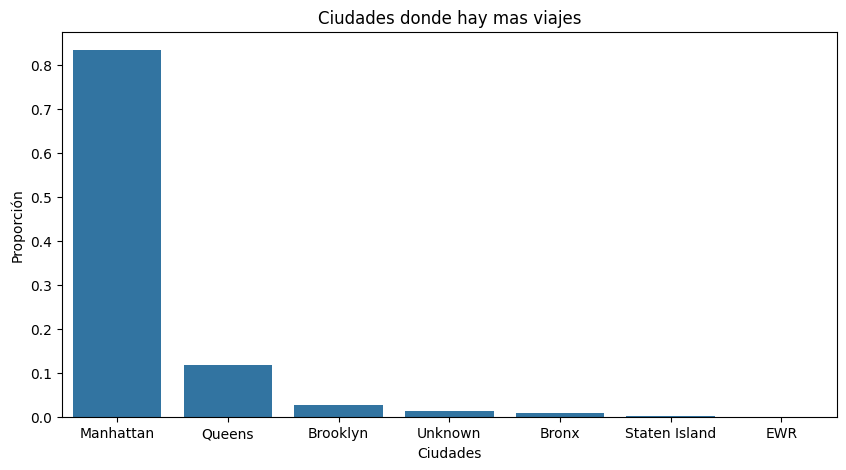

In [29]:
plt.figure(figsize=(10,5))
Localidades_ordenados = tabla_unida_ciudades.value_counts(subset="Borough",ascending=False).index
sns.countplot(data=tabla_unida_ciudades,x="Borough",order=Localidades_ordenados,stat="proportion")
plt.xlabel("Ciudades")
plt.ylabel("Proporción")
plt.title("Ciudades donde hay mas viajes")
plt.show()

* acá se logra ver que la ciudad de Manhattan es donde hay mas consumo de taxis con un porcentaje aproximado de 83%

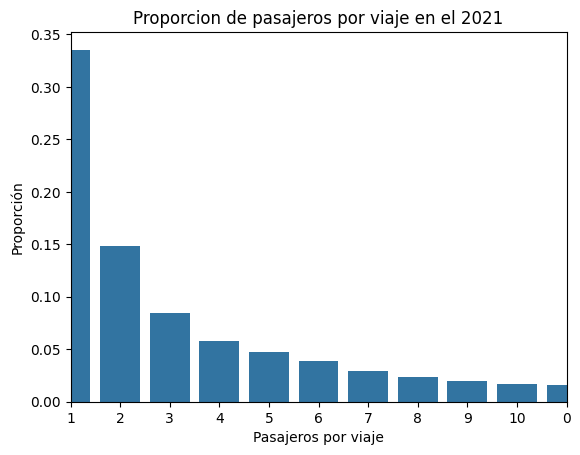

In [30]:
cantidad_pasajeros_ordenado = tabla_unificada.value_counts(subset="passenger_count",ascending=False).index
sns.countplot(data=tabla_unificada,x="passenger_count",order=cantidad_pasajeros_ordenado,stat="proportion")
plt.xlim(0,10)
plt.xlabel("Pasajeros por viaje")
plt.ylabel("Proporción")
plt.title("Proporcion de pasajeros por viaje en el 2021")
plt.show()

* analisis de la proporcion de pasajeros por viaje en el 2021: Se pudo analizar que la mayoria de los pasajeros por dia en todo el año es de 1 y 2. 
    * con un 35% de 1 pasajero por dia 
    * 15% de 2 pasajeros por dia
    * algo muy particular es que hay una cantidad de 0 pasajeros con menos del 5% por la cual es dudoso por el hecho de que debe ser desplazamiento hacia otras zonas o mantenimiento hacia los talleres

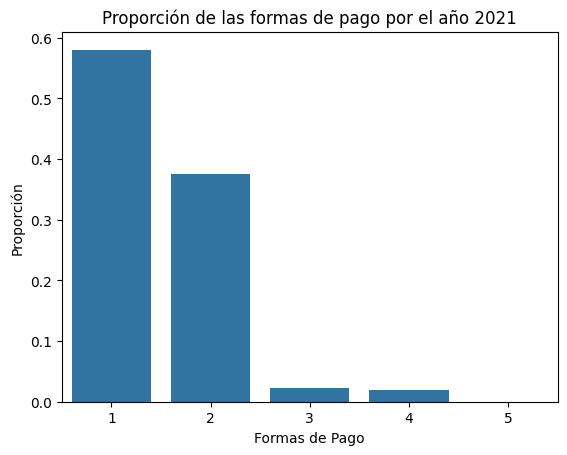

In [31]:
sns.countplot(data=tabla_unificada,x="payment_type",stat="proportion")
plt.title("Proporción de las formas de pago por el año 2021")
plt.xlabel("Formas de Pago")
plt.ylabel("Proporción")
plt.show()

* Analisis de la proporcion de formas de pago en el año 2021 es:
    * con aproximadamente el 60% paga con tarjeta de credito
    * con aproximadamente el 37% paga en efectivo

In [32]:
tabla_unificada

,fecha,VendorID,payment_type,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,año
0,2008-12-31,2,2,1,193,193,1,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,2008
1,2009-01-01,2,2,1,41,238,6,1.31,8.5,0.0,0.5,0.00,0.00,0.3,11.80,2.5,2009
2,2009-01-01,2,2,1,132,10,1,4.09,13.0,0.5,0.5,0.00,0.00,0.3,14.30,0.0,2009
3,2009-01-01,2,2,1,188,89,1,1.46,9.5,0.0,0.5,0.00,0.00,0.3,10.30,0.0,2009
4,2020-12-31,2,1,1,48,239,1,1.74,7.0,0.5,0.5,3.24,0.00,0.3,14.04,2.5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498435,2022-02-07,2,2,1,48,230,4,0.66,5.0,0.5,0.5,0.00,0.00,0.3,8.80,2.5,2022
498436,2022-02-12,2,1,1,170,236,3,2.06,8.5,0.5,0.5,2.46,0.00,0.3,14.76,2.5,2022
498437,2022-02-12,2,2,1,158,170,3,2.15,7.5,0.5,0.5,0.00,0.00,0.3,11.30,2.5,2022
498438,2022-02-15,2,1,1,113,234,2,0.24,3.0,0.5,0.5,1.36,0.00,0.3,8.16,2.5,2022


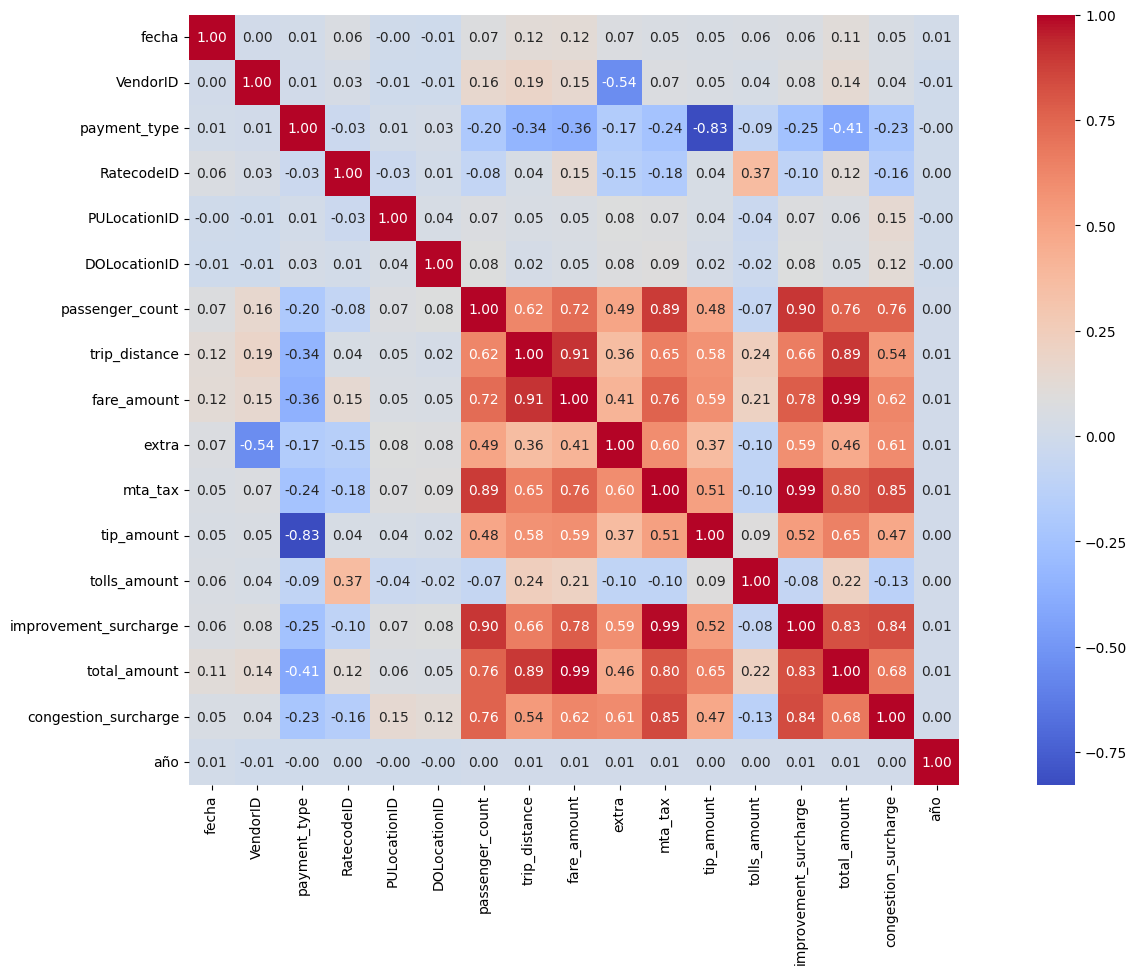

In [33]:
plt.figure(figsize=(20,10)) 
sns.heatmap(tabla_unificada.corr(method=("spearman")), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},cmap= 'coolwarm')
plt.show()

* mediante la grafica de correlación podemos ver que:
    * la cantidad de pasajeros depende trafico que haya en Nueva York ,los impuestos que se le cobran y el costo total del viaje
    * la distancia de viaje depende de la distancia,la cantidad de pasajeros y la congestion en Nueva York

# como analisis final de este dataset:

* hay muchos valores nulos en algunas columnas,outliers con los años de los viajes y tambien con las localidades de partida y llegada. y datos en 0 que haria incierto algunos viajes.
* el mayor volumen de de taxis amarillos es en la zona de Manhattan con un 83%. y especificamente en los aeropuertos John F.Kennedy,LaGuardia y la estación Penny Station.
* la hora que mas solicitud tiene de viajes un taxi es entre las 10 am hasta las 7 pm.
* el 60% de los viajes pagan con tarjeta de credito y el 37% en efectivo. se podria decir que el 60% es porque lo solicitan mediante a la APP de taxis.
* aproximadamente el 50% de los viajes son entre 1 y 2 pasajeros por dia.
* mediante una grafica de correlativas logramos descubrir que la cantidad de pasajeros por viaje depende del trafico de Nueva York, a estos se lo ve tambien correlacionado el  coste de viaje ya que cobran un impuesto de mejora y por trafico.
    * las propinas que recibe por viaje depende mayormente de la forma de pago.
